# CHAPTER - 11: Model Evaluation

Stratergies for evaluating the quality of models.

Our goal is not to create models but to create high-quality models.


## 11.1 Cross Validation models


If we train a model on our data and evaluate how well it did on that data, we do not achieve desired goal, Here we should not evaluate the model on our training data, but how well it does on data it has never seen before.

One way is to hold off a slice of data for testing called **validation**.

In the validation the data is split into two sets, traditionally a 'training set' and a 'test set'.

We put the test set aside and take training data to train our model using features and target and teach the model to make best prediction. Then we test on the test data which out model has never seen.

In [1]:
# importing libraries

from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# loading digits dataset

digits = datasets.load_digits()

In [3]:
# Create features matrix
features = digits.data

In [4]:
# creating target vector

target = digits.target

In [5]:
# create standardizer
standardizer = StandardScaler()

In [6]:
# creating logistic regression object

logit = LogisticRegression()

In [7]:
# creating a pipeline that standardizes and then runs logistic regression

pipeline = make_pipeline(standardizer, logit)

Validation approach has two weaknesses:
1) Performance of the model can be highly dependent on the few observations of the test set.
2) Model is not trained using all the available data, and not being evaluated on all the available data.

To overcome these weakenesses we use **k-fold cross-validation** (KFCV) stratergy.

In this, we split the data into k parts called "folds", the model is then trained using k - 1 folds(combined into one set), and the last fold is used as a test set.

we repeat this k times, each time using a different fold as the test set.

The performance on the model for each of the k iterations is then averaged to produce an overall measurement.

Things to consider when using KFCV:
1) It assumes that each observation is created independent from the other(i.e., the data is independent identically distributed[IID]), If the data is IID it is suggested to shuffle the observationswhen assigning to folds, hence the 'shuffle = True'.
2) It is benificial if the folds have roughly same percentage of observations from each of different target classes(called stratified k-fold). Ex: if target vector has 80% of male observations and 20% of female observations then each fold would contain same percentage of male and female observations. We can use StratifiedKFold instead of KFold in the below.
3) It is important to preprocess daat based on training set and then apply transformations.

In [20]:
# creating K-Fold cross-validation

# we split the data into k parts called 'folds' that is

# we are taking 10 folds

kf = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [21]:
# Conducting K-Fold validation

cv_result = cross_val_score(pipeline, # Pipeline
                           features,  # Feature matrix 
                           target,    # Target vector
                           cv = kf,   # Cross-validation technique
                           scoring = "accuracy", # Loss function
                           n_jobs = -1) # Use all CPU scores

In [22]:
# Score for all ten folds

cv_result

array([0.97777778, 0.98888889, 0.96111111, 0.94444444, 0.97777778,
       0.98333333, 0.95555556, 0.98882682, 0.97765363, 0.93854749])

In [11]:
# Calculating mean of the 10 folds

cv_result.mean()

0.9693916821849783

In [13]:
# importing libraries

from sklearn.model_selection import train_test_split

In [15]:
# creating training and test stes

features_train, features_test, target_train, target_test = train_test_split( 
    features, 
    target,
    test_size = 0.1,
    random_state = 1)

In [17]:
# fitting standardizer to training set
standardizer.fit(features_train)

StandardScaler()

We are only fitting training set because we are pretending that the test set is unknown data. If we fit both of them then our preprocessers using observations from both training and test stes, some of the informations from the test set leaks into our training set.

This rule is for any preprocessing step of feature selection.

In [19]:
# apply for both trainng and test sets

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

sci-kit learn's pipeline package makes it easy for preprocess the data first(standardizer) then trains the model(logistic regression, logit) by creating a pipeline.

In [23]:
# creating pipeline 

pipeline = make_pipeline(standardizer, logit)

In [24]:
# doing k-fold cross-validation

cv_results = cross_val_score(pipeline, # Pipeline
                            features, # Feature matrix
                            target, # Target vector
                            cv = kf, # Cross-validation technique
                            scoring = "accuracy", # loss function/metric for success
                            n_jobs = -1) # use all CPU scores

## 11.2 Creating a Baseline Regression Model

A simple baseline regression model to compare against our model.

Using DummyRegressor to create a simple model to use as a baseline.

In [26]:
# Loading libraries

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [27]:
# loading the data

california = fetch_california_housing()

In [28]:
# create features

features, target = california.data, california.target

In [29]:
# doing the train and test split 

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, random_state = 0)

In [30]:
# creating a dummy regressor

dummy = DummyRegressor(strategy = 'mean')

In [31]:
# train the dummy regressor

dummy.fit(features_train, target_train)

DummyRegressor()

In [32]:
# get R-Squared score

dummy.score(features_test, target_test)

-0.0004092193772518016

In [33]:
# to compare we train our model and evaluate the performance score

# loading the libraries

from sklearn.linear_model import LinearRegression

In [35]:
# train simple linear regression model

ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression()

In [36]:
# get R-squared score

ols.score(features_test, target_test)

0.5911695436410469

In [37]:
# create a dummy regressor that predicts 20's for everything

clf = DummyRegressor(strategy = 'constant', constant = 20)
clf.fit(features_train,target_train)

DummyRegressor(constant=20, strategy='constant')

In [38]:
# evaluate score

clf.score(features_test, target_test)

-243.72078583753475

DummyRegressor is to create a very simple model that we can use as a baseline to compare against our actual model. 

## 11.3 Creating a Baseline Classification Model

Simple baseline classifier to compare against our model.

In [41]:
# load libraries

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [44]:
# loading the daatset

iris = load_iris()

In [49]:
features, target = iris.data, iris.target

In [50]:
# creating target vector and feature matrix

feature_train, feature_test, target_train, target_test = train_test_split(features,
                                                                         target, random_state = 0)

In [58]:
# creating dummy classifier

dummy = DummyClassifier(strategy = 'uniform', random_state = 1)

# we have uniform and stratified stratergies

# To explain with an example:
# stratified makes proportions such that if 20% are female, the the dummyClassifier will 20% of the female
# uniform will generate 50% male and 50% female though the observations have 80% male and 20% female

In [52]:
# train model

dummy.fit(feature_train, target_train)

DummyClassifier(random_state=1, strategy='uniform')

In [53]:
# get accuracy score

dummy.score(feature_test, target_test)

0.42105263157894735

In [54]:
# Comparing baseline classifier to trained classifer

from sklearn.ensemble import RandomForestClassifier

In [55]:
# create classifer
classifier = RandomForestClassifier()

In [56]:
# train the model
classifier.fit(feature_train, target_train)

RandomForestClassifier()

In [57]:
# get the accuracy score

classifier.score(feature_test, target_test)

0.9736842105263158

## 11.4 Evaluating Binary Classifier Predictions

Given a trained classification model and we want to evaluate its quality.
 
'scoring' parameter in cross-validation is to define number of performance metrics, like accuracy, precision, recall, and F1.

Accuracy: It is the proportion of observations predicted correctly.

accuracy = (TP + TN)/(TP + TN + FP + FN)

TP: True Positive

TN: True Negative

FP: False positive

FN: False Negative

In [59]:
# loading libraries

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [60]:
# generate feature matrix and target vector

X, y = make_classification(n_samples = 10000,
                          n_features = 3,
                          n_informative = 3,
                          n_redundant = 0,
                          n_classes = 2,
                          random_state = 1)

In [61]:
# create logistic regression
logit = LogisticRegression()

In [62]:
# cross-validate model using accuracy

cross_val_score(logit, X, y, scoring = "accuracy")

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In real world often data had imbalanced classes, in such cases accuracy suffers. For this reason we use other metrics such as precision, recall, and F1 score.

Precision: Proportion of every observation predicted to be positive that is actually positive.

precision = TP/(TP + FP)

In [64]:
# cross-validate model using precision

cross_val_score(logit, X, y, scoring = "precision")

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

Recall: proportion of every positive observation that is truly positive.

recall = TP/(TP + FN)

In [68]:
# cross-validate model using recall

cross_val_score(logit, X, y, scoring = "recall")

array([0.951, 0.952, 0.953, 0.949, 0.951])

F1 score: measure of correctness achieved in positive prediction, it used to bring balance in Precision and Recall

F1 = 2 x (Precision x Recall) / (Precision + Recall)

In [67]:
# cross-validate model using f1 score

cross_val_score(logit, X, y, scoring = "f1")

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [69]:
# If we have the true y values and predicted y values 
# we can calculate metrics like accuracy and recall directly

# loading the libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
# creating training and test splits

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.1,
                                                   random_state = 1)

In [71]:
# Predict values for training target vector

y_hat = logit.fit(X_train, y_train).predict(X_test)

In [72]:
# Calculate accuracy

accuracy_score(y_test, y_hat)

0.947

## 11.5 Evaluating Binary Classifier Thresholds

Evaluating binary classifier and various probability thresholds.

Receiving Operating Charecteristic(ROC) curve is a common method for evaluationg the quality of a binary classifier. ROC compares the presence of true positives and fals positivesat every probability threshold. By plotting this curve we can see how the model performs.

In [73]:
# loading the libraries

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [74]:
# creating feature matrix and target vector

features, target = make_classification(n_samples = 10000,
                                      n_features = 10,
                                      n_classes = 2,
                                      n_informative = 3,
                                      random_state = 3)

In [75]:
# split into training and test sets

feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size = 0.1,
                                                                         random_state = 1)

In [76]:
# create classifier

logit = LogisticRegression()

In [77]:
# train the model

logit.fit(feature_train, target_train)

LogisticRegression()

In [78]:
# get predicted probabilities

target_probabilities = logit.predict_proba(feature_test)[:,1]

In [79]:
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

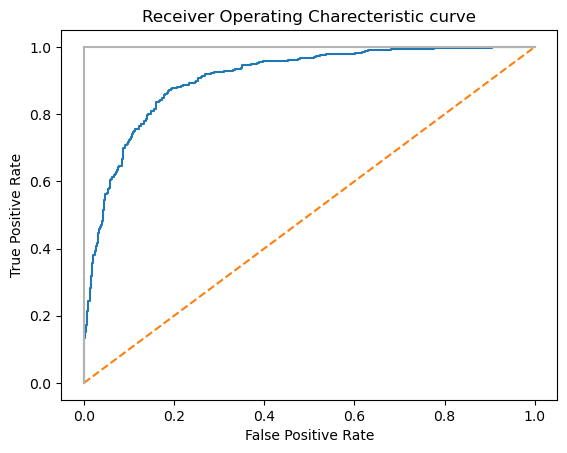

In [80]:
# plot ROC curve

plt.title("Receiver Operating Charecteristic curve")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c = ".7"), plt.plot([1,1], c = ".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [81]:
# we can use predict_proba to see predicted probabilities for the first observation

logit.predict_proba(feature_test)[0:1]

array([[0.86891533, 0.13108467]])

In [82]:
logit.classes_

array([0, 1])

From the above, the first observation had 87% chance of being in the negative class(0) and a 13% chance of being in the positive class(1). By default scikit-learn predicts an observation is a part of the positive class if the probability is greater than 0.5 (called the threshold).

True Positive Rate, TPR = True Positives / (True Positives + False Negatives)

False Positive Rate, FPR = False Positives / (False Positives + True Negatives)


In [84]:
# with a threshold of 0.50

print("Threshold:", threshold[116])
print("True Positive Rate:", true_positive_rate[116])
print("False Positive Rate:", false_positive_rate[116])

Threshold: 0.5331715230155317
True Positive Rate: 0.810204081632653
False Positive Rate: 0.14901960784313725


In [85]:
# by increasing the threshold to 80%

print("Threshold:", threshold[45])
print("True Positive Rate:", true_positive_rate[45])
print("False Positive Rate:", false_positive_rate[45])

Threshold: 0.818913387665929
True Positive Rate: 0.5448979591836735
False Positive Rate: 0.047058823529411764


In addition to visualizing the trade-off between TPR and FPR , the ROC curve can also be used as a general metric model. 

The better the model is, the higher the curve and thus the greater the area under the curve.

In order to judge the overall equality of a model at all possible thresholds area under the ROC curve is calculated(AUROC).

In [86]:
# area under the curve

roc_auc_score(target_test, target_probabilities)

0.9073389355742297

## 11.6 Evaluating Multiclass Classifier Predictions

If we have a model that predicts three or more classes and wants to evaluate its performance.

Using cross-evaluation metric that is capable of handling more than 2 classes.

In [87]:
# loading libraries

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [92]:
# generate feature matrix and target vector

features, target = make_classification(n_samples = 10000,
                                      n_features = 3,
                                      n_informative = 3,
                                      n_redundant = 0,
                                      n_classes = 3,
                                      random_state = 1)

In [93]:
# creating logistic regression

logit = LogisticRegression()

In [94]:
# cross-validate model using accuracy

cross_val_score(logit, features, target, scoring = 'accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

All the metrics such as accuracy, precision, recall and F1 scores are for evaluating binary classifiers, many of these metrics can be extended for us when we have more than two classes by treating our data as set of binary classes.

Methods used to average the evaluation scores from classes:

**macro**: Calculate mean of metric scores for each class, weighting each class equally.

**weighted**: Calculate mean of metric scores for each class, weighting each class proportional to its size in the data.

**micro**: Calculate the mean of metric scores for each observation-class combination.

Here we'll be doing that using macro averaged f1.

In [95]:
# cross-validation using macro averaged f1

cross_val_score(logit, features, target, scoring='f1_macro')

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

## 11.7 Visualizing a Classifier's Performance

Given true classes and predicted classes of the test data and visualizing the model's quality.

Using a confusion matrix, which compares predicted classes and true classes.

In [96]:
# loading the libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [97]:
# loading data

iris = datasets.load_iris()

In [98]:
# create feature matrix

features = iris.data

In [99]:
# create target vector

target = iris.target

In [100]:
# create list of target class names

class_names = iris.target_names

In [101]:
# create trainig and test set

feature_train, feature_test, target_train, target_test = train_test_split(features,
                                                                         target,
                                                                         random_state = 1)

In [102]:
# create logistics regression

logit = LogisticRegression()

In [103]:
# train model and make predictions

target_predicted = classifier.fit(feature_train, target_train).predict(feature_test)

In [104]:
# create confusion matrix

matrix = confusion_matrix(target_test, target_predicted)

In [105]:
# create a dataframe

dataframe = pd.DataFrame(matrix, index = class_names, columns = class_names)

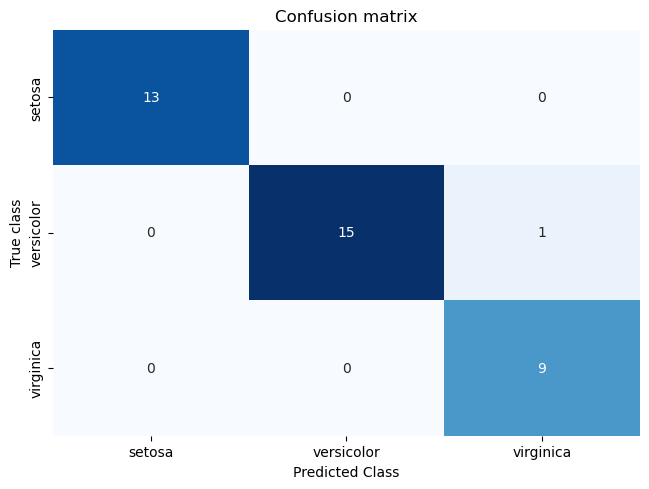

In [109]:
# create heatmap

sns.heatmap(dataframe, annot = True, cbar = None, cmap = "Blues")
plt.title("Confusion matrix"), plt.tight_layout()
plt.ylabel("True class"), plt.xlabel("Predicted Class")
plt.show()

From above, we can see that the model successfully prdicted 9 virginica observations but predicted 1 flower to be virginica which actually is a Iris versicolor.

A confusion matrix lets us see not only where the model was wrong, but also how it was wrong.

## 11.8 Evaluating Regression Models

Evaluating the performance of the regression model.

Using mean squared error:

In [110]:
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [113]:
# generate feature matrix and target vector

features, target =  make_regression(n_samples = 100,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 50,
                                   coef = False,
                                   random_state = 1)

In [114]:
# create a linear regression object

ols = LinearRegression()

In [115]:
# cross-validate the linear regression using (negative) MSE

cross_val_score(ols, features, target, scoring = 'neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [116]:
# common regrssion metric is the coefficient of determination , R-squared

# cross-validate the linear regression using R-squred

cross_val_score(ols, features, target, scoring = 'r2')

array([0.8622399 , 0.85838075, 0.74723548, 0.91354743, 0.84469331])

## 11.9 Evaluating Clustering Models

We can not evaluating how well a Unsupervised learning algorithm worked in clustering data, one option is to evaluate clustering using silhouette coefficients, which measure the quality of clusters:

In [117]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [118]:
# generate feature matrix

features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state = 1)

we use clustering(unsupervised learning) methods because the data doesnt have target vector.

We cannot evaluate predictions versus true values since there is no target vector, we can evaluate the nature of clusters.

We can imagine good clusters having small distances between the observations(dense clusters) and large distance between the different clusters (well-spread clusters).

In [119]:
# cluster data using k-means to predict classes

model = KMeans(n_clusters = 2, random_state = 1).fit(features)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [120]:
# get predicted classses

target_predicted = model.labels_

In [121]:
# evaluate model

silhouette_score(features, target_predicted)

0.8916265564072141

## 11.10 Creating a Custom Evaluation Metric

Evaluating a model using a created custom metric.

scikit-learn has number of inbuilt metrics for evaluating a model performance it is useful to define our own metric, we can do that using make_scorer:
1) In this we define a method that takes 2 values: true target vector and predicted target vector
2) we specify whether the higher or lower scores are desirable, using the greater_is_better parameter

In [125]:
# loading libraries

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

In [126]:
# generate features matrix and target vector

features, target = make_regression(n_samples = 100,
                                  n_features = 3,
                                  random_state = 1)

In [127]:
# creating training set and test set

feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                          target, 
                                                                          test_size = 0.10, 
                                                                          random_state = 1)

In [128]:
# creating a custom metric

def custom_metric(target_test, target_predicted):
    
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    
    return r2

In [ ]:
# make scorer and defining higher scores are better

score = make_scorer(custom_metric, greater_is_better = True)

In [130]:
# create ridge regression object

classifier = Ridge()

In [131]:
# train the regression model

model = classifier.fit(feature_train, target_train)

In [132]:
# applying custom scorer

score(model, feature_test, target_test)

0.9997906102882058

## 11.11 Visualizing the Effect of Training Set Size

Evaluating the effect of no.of observations in training dataset on some metric.

plotting learning curve:

In [133]:
# load libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

In [134]:
# load data

digits = load_digits()

In [135]:
# create feature matrix and target vector

features, target = digits.data, digits.target

In [137]:
# create trainig and test scores for various training set sizes

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), # Classifier
                                                       features, # Feature matrix
                                                       target, # Target vector
                                                       cv = 10, # no of folds
                                                       scoring = 'accuracy', # Performance metric
                                                       n_jobs = -1, # use all computer cores
                                                        # sizes of 50 training set
                                                       train_sizes = np.linspace(0.01, 1.0, 50)) 

In [141]:
# creating means and standard devaitaions of training set scores

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

In [142]:
# create means and standard deviations of test set

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

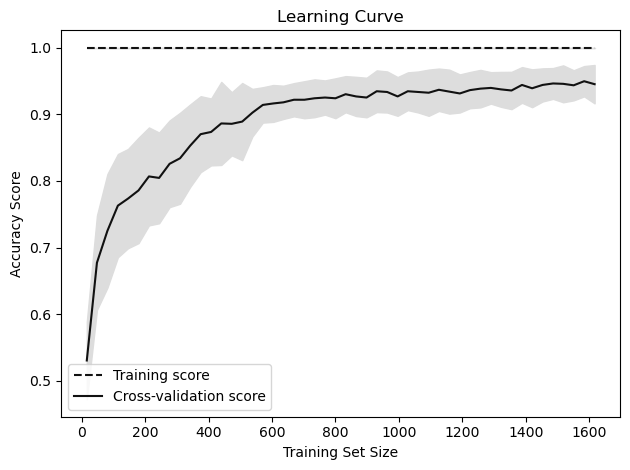

In [143]:
# to draw lines

plt.plot(train_sizes, train_mean, '--', color = "#111111", label = "Training score")
plt.plot(train_sizes, test_mean, color = "#111111", label = "Cross-validation score")

# to draw bands

plt.fill_between(train_sizes, train_mean - train_std,
                train_mean + train_std, color = "#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                test_mean + test_std, color = "#DDDDDD")

# Creating plot

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

We are plotting the accuracy of a Random forest classifier at 50 different training set sizes ranging from 1% of observations to 100%.

Increasing accuracy score of the cross-validated models tell us that we  would likely benefit from additional observations.

## 11.12 Creating a Text Report of Evaluation Metrics

Creating a quick description of a classifier's performance.

using scikit-learns classification_report:

In [146]:
# loading libraries

from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [157]:
# loading data

iris = datasets.load_iris()

In [158]:
# create feature matrix

features = iris.data

In [159]:
# create target vector

target = iris.target

In [160]:
# create list of target class names

class_names = iris.target_names

In [161]:
# creating training and test set

feature_train, feature_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            random_state = 1)

In [162]:
# create logoistic regression

classifier = LogisticRegression()

In [163]:
# training the model and making predictions

model = classifier.fit(features_train, target_train)
target_predicted = model.predict(feature_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [164]:
# creating a classification report
print(classification_report(target_test, target_predicted, target_names = class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



## 11.3 Visualizing the Effect of Hyperparameter

To understand how the performance of a model changes as the value of some hyperparameter changes.

Plotting the validation curve:

In [165]:
# loading libraries

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [166]:
# loading the data

digits = load_digits()

In [168]:
# creating feature matrix and target vector

features, target = digits.data, digits.target

In [169]:
# creating range of values for parameter

param_range = np.arange(1, 250, 2)

In [172]:
# calculating accuracy on training and test sets using range parameter

train_scores, test_scores = validation_curve(RandomForestClassifier(), # classifier
                                            features, # feature matrix
                                            target, # target vector
                                            param_name = "n_estimators", # hyperparameter to examine
                                            param_range = param_range, # range of hyperparameters range
                                            cv = 3, # no of folds
                                            scoring = "accuracy", # performance metric
                                            n_jobs = -1 # use all computer cores
                                            )

In [173]:
# Calculate mean and standard deviation for training set scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [174]:
# Calculate mean and standard deviation for test set scores

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

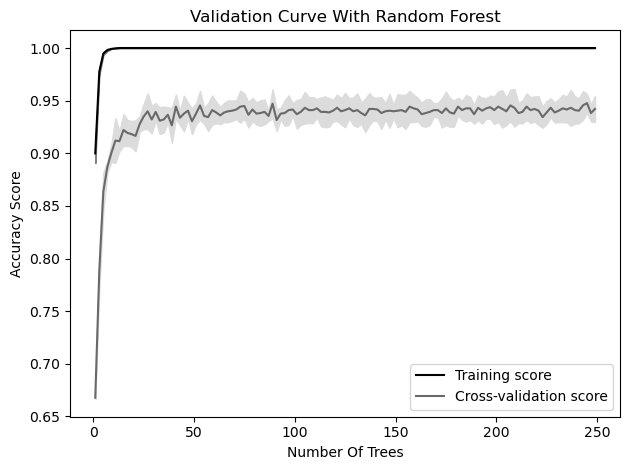

In [175]:
# Plot mean accuracy scores for training and test sets

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets

plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")

# Create plot

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()